# 1248. Count Number of Nice Subarrays

### Difficulty: <font color = orange> Medium </font>

---

Given an array of integers `nums` and an integer `k`. A continuous subarray is called nice if there are `k` odd numbers on it.

Return the number of nice sub-arrays.

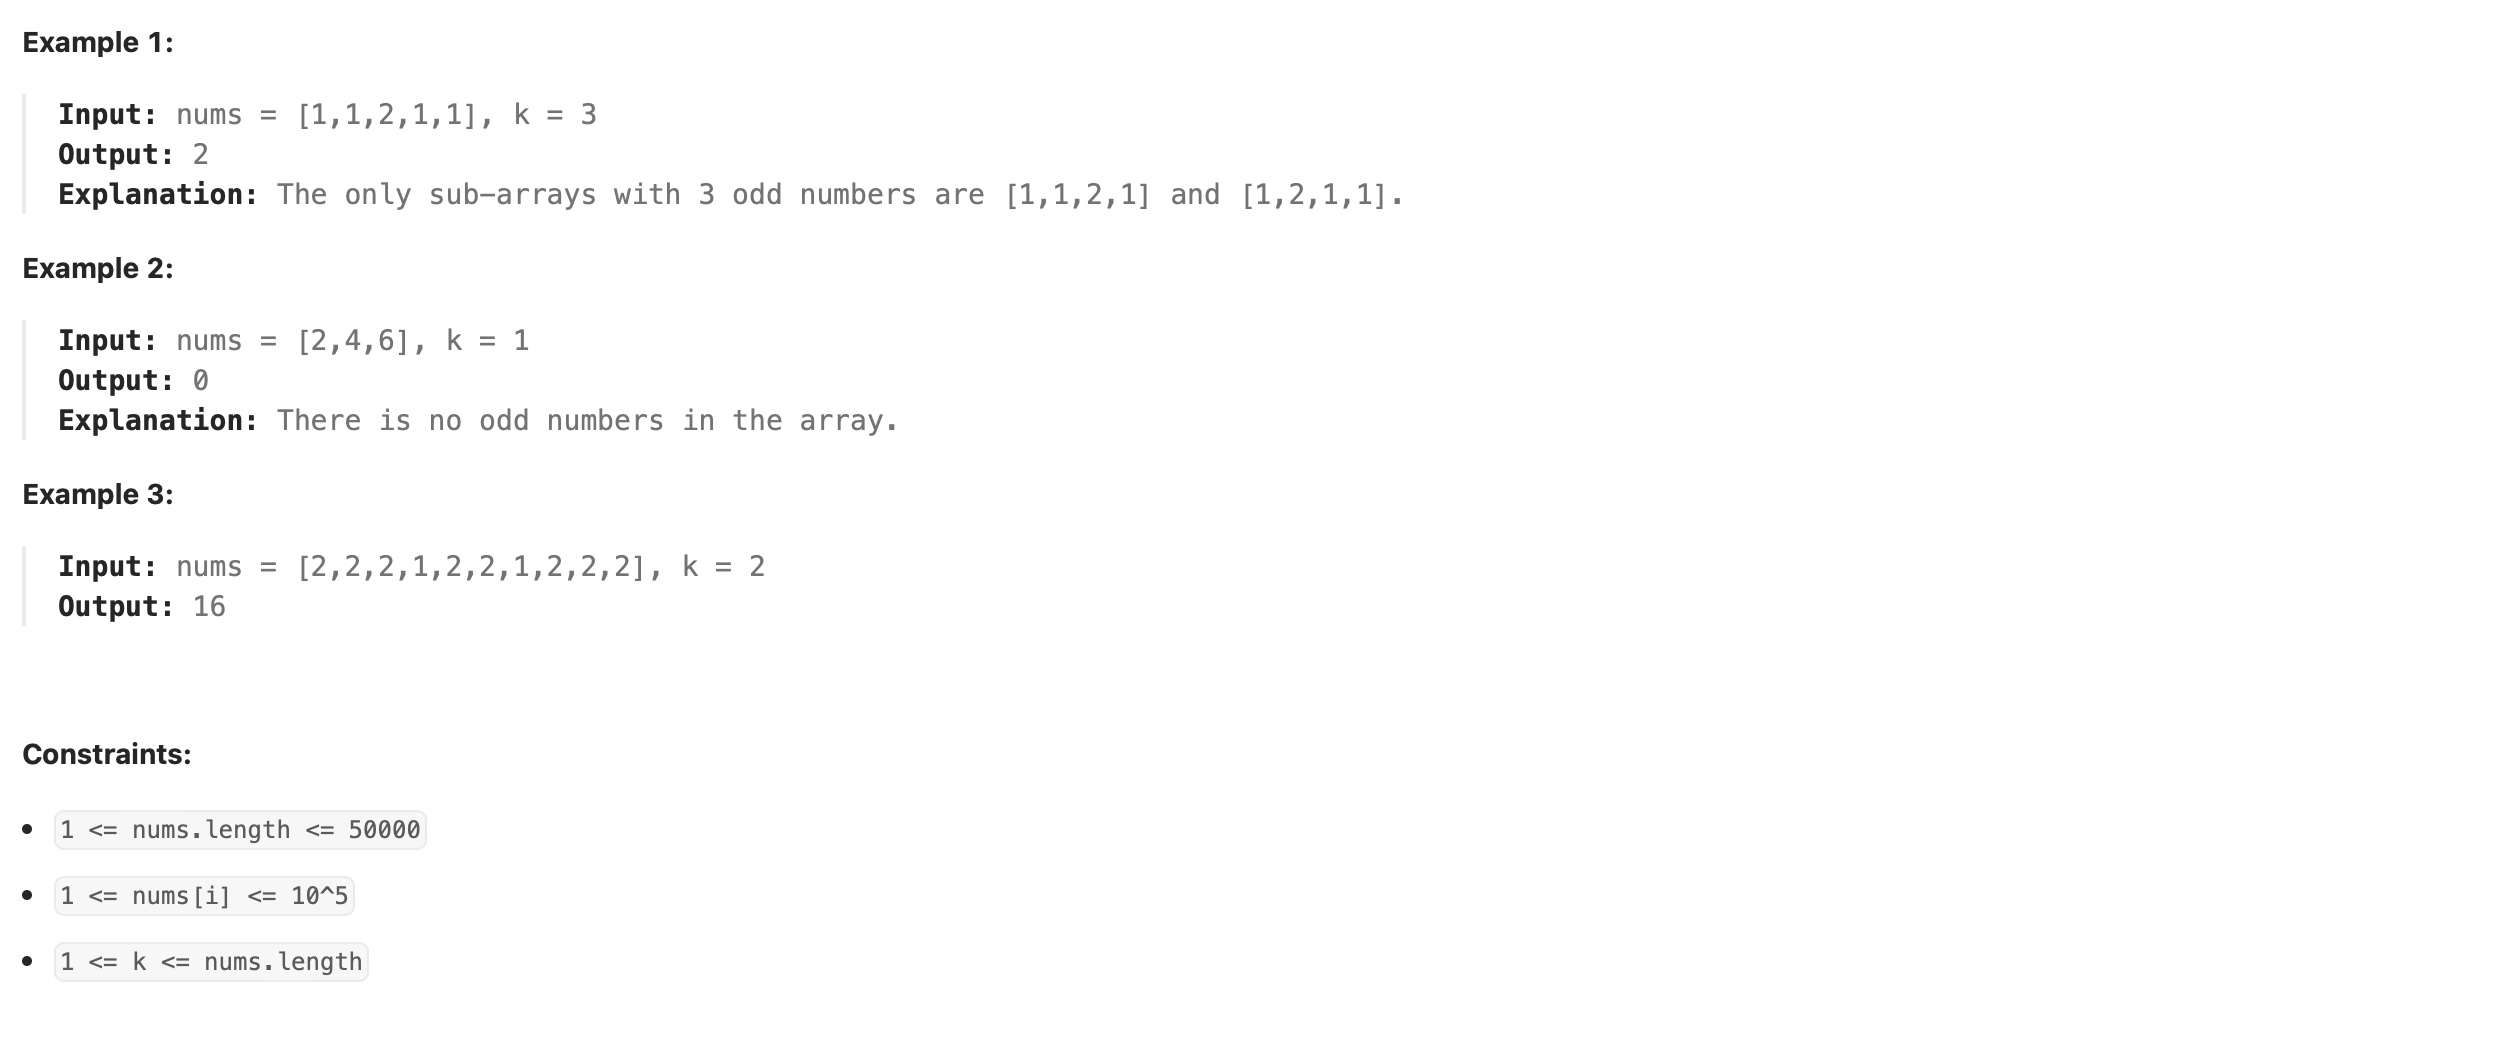

## Approach Overview:

We have to use the "AtMost" trick to solve this. 

It's a smart question reframe that allows us to solve alot of "number of subarrays or subtring problems with specific constraint."

This is the guiding formula we'll use for this problem. 

`number of subarrays with `k` odd numbers = number of subarrays with <= k odd numbers - number of subarrays with <= k - 1 odd numbers`.

We use a helper fucntion to implement the AtMost algo. 

Here's the algorithm's overview:

Go through every element in nums and check if it can constitute a valid subarray (i.e. if the number of odd numbers in the subarray it will compromise is less than or equal to `k`). 

- If subarray is not valid (i.e. if number of odd numbers in subarray > k), then shrink it by removing the leftmost element from it until it becomes valid again (i.e. until the number of odd numbers in subarray <= k).

- If subarray is valid, then calculate the total number of valid subarrays (with <= k odd numbers) seen so far.

We then call this function with paramater `k` and then with paramater `k - 1` and we take the difference of their output to find the desired result.

## Detailed Explanation:


We have to use the "AtMost" trick to solve this. 

It's a smart question reframe that allows us to solve alot of "number of subarrays or subtring problems with specific constraint."

This is the guiding formula we'll use for this problem. 

`number of subarrays with `k` odd numbers = number of subarrays with <= k odd numbers - number of subarrays with <= k - 1 odd numbers`.

We use a helper fucntion to implement the AtMost algo. 

Here's the algorithm's overview:

Go through every element in nums and check if it can constitute a valid subarray (i.e. if the number of odd numbers in the subarray it will compromise is less than or equal to `k`). 

- If subarray is not valid (i.e. if number of odd numbers in subarray > k), then shrink it by removing the leftmost element from it until it becomes valid again (i.e. until the number of odd numbers in subarray <= k).

- If subarray is valid, then calculate the total number of valid subarrays (with <= k odd numbers) seen so far.

We then call this function with paramater `k` and then with paramater `k - 1` and we take the difference of their output to find the desired result.

*// return number of subarrays with k odd numbers in them*

*// subarrays with k odd numbers = subarrays with <= k odd numbers - subarrays with <= k - 1  odd numbers*

 `return atMostK(k) - atMostK(k-1)`

## Key Challenges:

Figuring out that this was an 'AtMost' problem 

## Solution:

In [ ]:
class Solution:
    def numberOfSubarrays(self, nums: List[int], k: int) -> int:
        
        # defining helper fucntion    
        def atMostK(k: int) -> int:

            # initialize left pointer for the sliding window
            left = 0
            
            # initialize `oddCount` to keep count of number of odd numbers in subarray 
            oddCount = 0

            # initialize `subarrayCount` variable to keep count of the number of   
            subarrayCount = 0
            
            # loop through every element in `nums`
            for right in range(len(nums)):
                
                # check if current element is an odd number
                if nums[right] % 2 != 0:

                    # if yes then increment odd counter 
                    oddCount += 1

                # check if current subarray / window is invalid 
                # (window's invalid if the number of odd numbers in it is > k)
                while oddCount > k:
                    
                    # check if leftmost character we want to remove is odd 
                    if nums[left] % 2 != 0:
                        
                        # if leftmost element is odd, remove it's count from oddCount 
                        oddCount -= 1

                    # increment left to slide the window     
                    left += 1

                # calculate and keep store of the number of valid subarray seen so far
                subarrayCount += right - left + 1

            # return the total number of valid subarray in `nums`
            # (i.e. number of subarrays with <=k odd numbers in them)  
            return subarrayCount

        # return number of subarrays with k odd numbers in them 
        # subarrays with k odd numbers = subarrays with <= k odd numbers - subarrays with <= k - 1  odd numbers
        return atMostK(k) - atMostK(k-1)